# Part 4. 시각화 도구

## 1. Matplotlib - 기본 그래프 도구

### 1-1. 선 그래프

##### <예제 4-1> 선 그래프

In [5]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('G:/강의자료/[책] 파이썬 머신러닝 판다스 데이터 분석/part4/시도별 전출입 인구수.xlsx')
df.head(2)

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226


In [6]:
# NaN을 앞 데이터로 채움
df.fillna(method='ffill', inplace=True)

df_seoul = df[(df['전출지별'] == '서울특별시')&(df['전입지별'] != '서울특별시')].drop('전출지별', axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

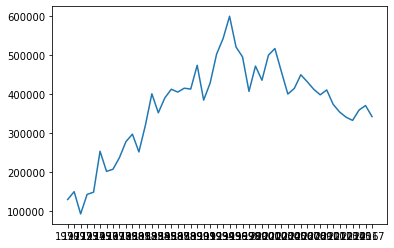

In [9]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

plt.plot(sr_one)

##### <예제 4-2> 차트 제목, 축 이름 추가

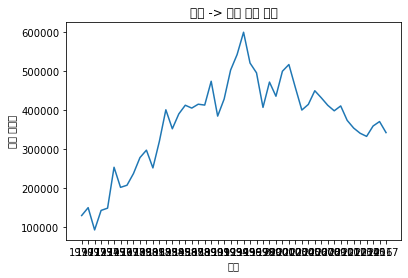

In [8]:
plt.plot(sr_one)
plt.title('서울 -> 경기 인구 이동')
plt.xlabel('기간')
plt.ylabel('이동 인구수')
plt.show()

##### <예제 4-3> 한글 폰트 오류 해결

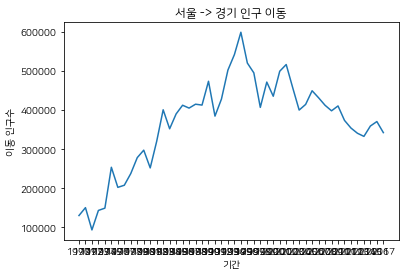

In [10]:
from matplotlib import font_manager, rc
font_path = 'C:/Windows/Fonts/NanumSquareRoundR.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.plot(sr_one)
plt.title('서울 -> 경기 인구 이동')
plt.xlabel('기간')
plt.ylabel('이동 인구수')
plt.show()

##### <예제 4-4> 그래프 꾸미기

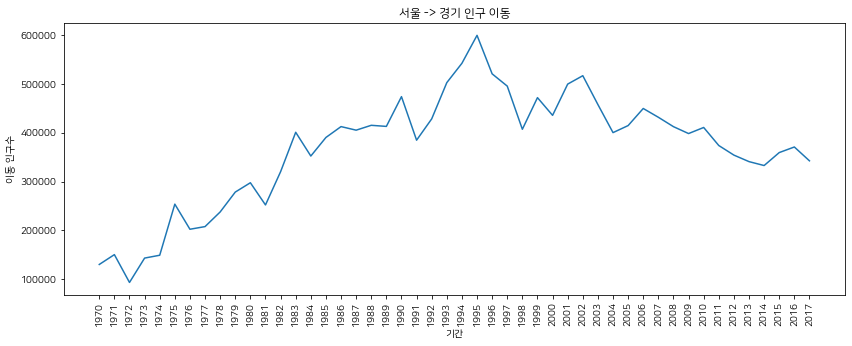

In [11]:
plt.figure(figsize=(14, 5))
plt.xticks(rotation='vertical')
plt.plot(sr_one)
plt.title('서울 -> 경기 인구 이동')
plt.xlabel('기간')
plt.ylabel('이동 인구수')
plt.show()

##### <예제 4-5> 스타일 서식 지정 등

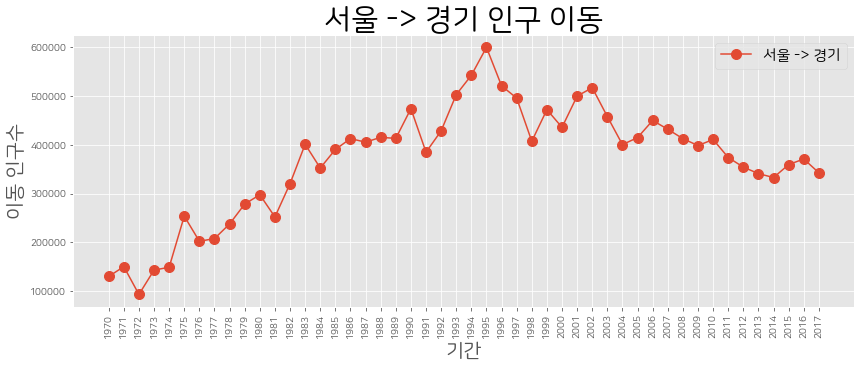

In [13]:
plt.style.use('ggplot')
plt.figure(figsize=(14, 5))
plt.xticks(size=10, rotation='vertical')
plt.plot(sr_one, marker='o', markersize=10)
plt.title('서울 -> 경기 인구 이동', size=30)
plt.xlabel('기간', size=20)
plt.ylabel('이동 인구수', size=20)
plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=15)
plt.show()

##### <예제 4-6> Matplotlib 스타일 리스트 출력

In [14]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


##### <예제 4-7> 주석 달기

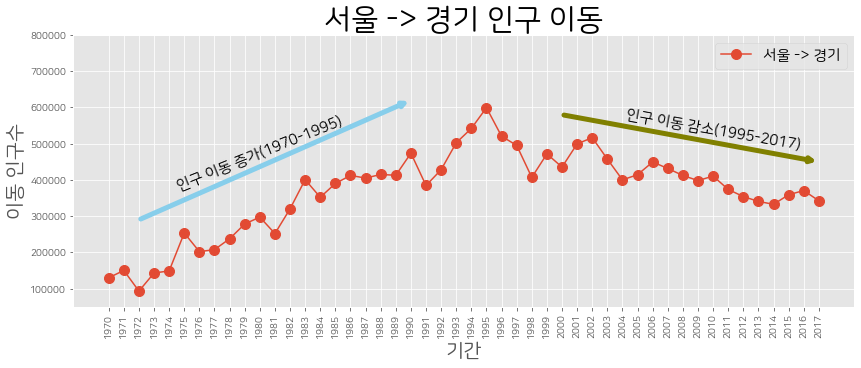

In [15]:
plt.style.use('ggplot')
plt.figure(figsize=(14, 5))
plt.xticks(size=10, rotation='vertical')
plt.plot(sr_one, marker='o', markersize=10)
plt.title('서울 -> 경기 인구 이동', size=30)
plt.xlabel('기간', size=20)
plt.ylabel('이동 인구수', size=20)
plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=15)

# y축 범위 지정
plt.ylim(50000, 800000)

# 주석 표시 - 화살표
plt.annotate('',
            xy=(20, 620000),
            xytext=(2, 290000),
            xycoords='data',
            arrowprops=dict(arrowstyle='->', color='skyblue', lw=5)
            )

plt.annotate('',
            xy=(47, 450000),
            xytext=(30, 580000),
            xycoords='data',
            arrowprops=dict(arrowstyle='->', color='olive', lw=5)
            )

# 주석 표시 - 텍스트
plt.annotate('인구 이동 증가(1970-1995)',
             xy=(10, 370000),
             rotation=22,
             va='baseline',
             ha='center',
             fontsize=15
             )

plt.annotate('인구 이동 감소(1995-2017)',
             xy=(40, 485000),
             rotation=-10,
             va='baseline',
             ha='center',
             fontsize=15
             )
plt.show()

##### <예제 4-8> 화면 분할하여 그래프 여러 개 그리기

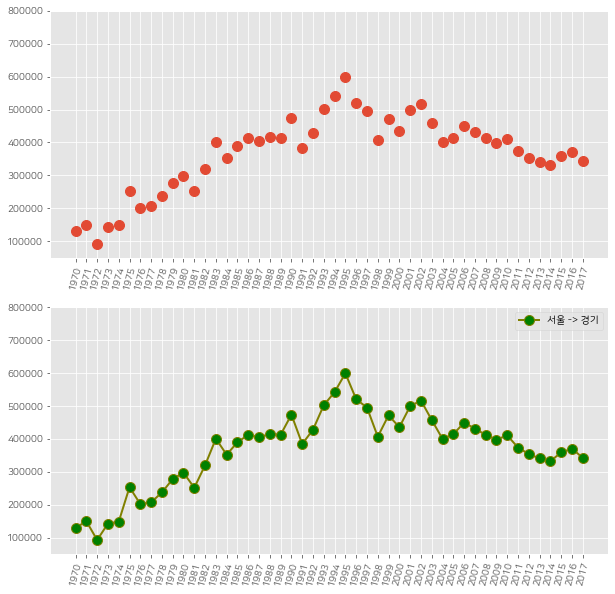

In [16]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.plot(sr_one, 'o', markersize=10)
ax2.plot(sr_one, marker='o', markerfacecolor='green', markersize=10, color='olive', linewidth=2, label='서울 -> 경기')
ax2.legend(loc='best')

ax1.set_ylim(50000, 800000)
ax2.set_ylim(50000, 800000)

ax1.set_xticklabels(sr_one.index, rotation=75)
ax2.set_xticklabels(sr_one.index, rotation=75)

plt.show()

##### <예제 4-9> axe 객체 그래프 꾸미기

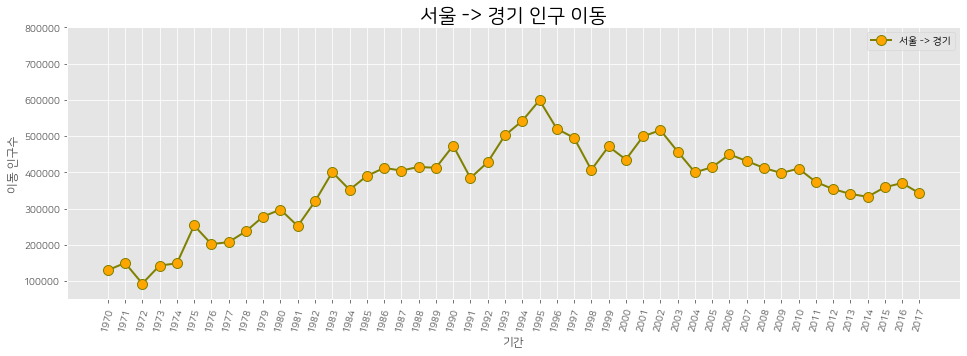

In [17]:
# 그래프 객체 색성
fig = plt.figure(figsize=(16, 5))
ax = fig.add_subplot(1, 1, 1)

# axe 객체에 plot 함수로 그래프 출력
ax.plot(sr_one, marker='o', markerfacecolor='orange', markersize=10, color='olive', linewidth=2, label='서울 -> 경기')
ax.legend(loc='best')

# y축 범위 지정
ax.set_ylim(50000, 800000)

# 차트 제목 추가
ax.set_title('서울 -> 경기 인구 이동', size=20)

# 축 이름 추가
ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size=12)

# 축 눈금 라벨 지정 및 75도 회전
ax.set_xticklabels(sr_one.index, rotation=75)

# 축 눈금 라벨 크기
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

plt.show()

##### <예제 4-10> 같은 화면에 그래프 추가

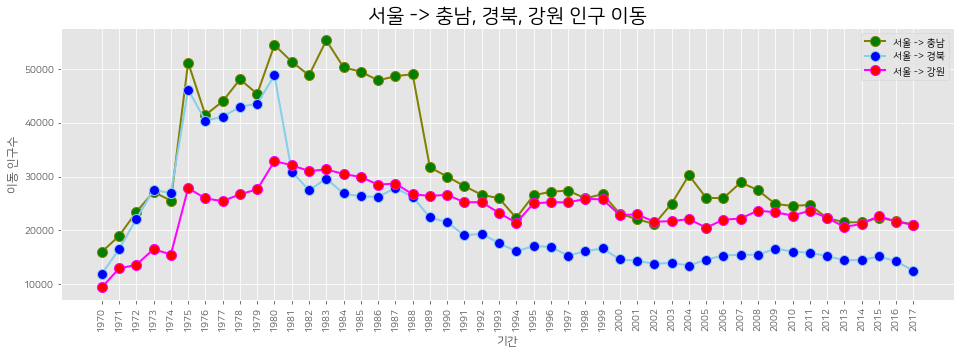

In [18]:
# 서울에서 '충청남도', '경상북도', '강원도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_3 = df_seoul.loc[['충청남도', '경상북도', '강원도'], col_years]

# 스타일 서식 지정
plt.style.use('ggplot')

# 그래프 객체 생성
fig = plt.figure(figsize=(16, 5))
ax = fig.add_subplot(1, 1, 1)

# axe 객체에 plot 함수로 그래프 출력
ax.plot(col_years, df_3.loc['충청남도', :], marker='o', markerfacecolor='green', markersize=10, color='olive', linewidth=2, label='서울 -> 충남')
ax.plot(col_years, df_3.loc['경상북도', :], marker='o', markerfacecolor='blue', markersize=10, color='skyblue', linewidth=2, label='서울 -> 경북')
ax.plot(col_years, df_3.loc['강원도', :], marker='o', markerfacecolor='red', markersize=10, color='magenta', linewidth=2, label='서울 -> 강원')

# 범례 표시
ax.legend(loc='best')

# 차트 제목 추가
ax.set_title('서울 -> 충남, 경북, 강원 인구 이동', size=20)

# 축 이름 추가
ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size=12)

# 축 눈금 라벨 지정 및 90도 회전
ax.set_xticklabels(col_years, rotation=90)

# 축 눈금 라벨 크기
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

plt.show()

##### <예제 4-11> 화면 4분할 그래프

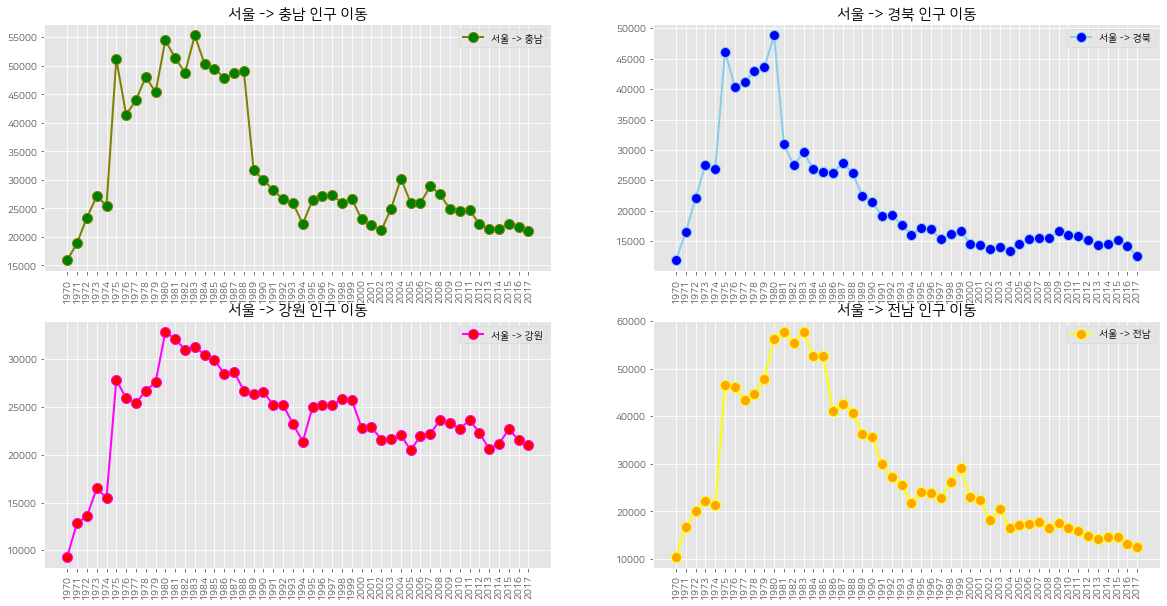

In [19]:
# 서울에서 '충청남도', '경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]

# 스타일 서식 지정
plt.style.use('ggplot')

# 그래프 객체 생성
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# axe 객체에 plot 함수로 그래프 출력
ax1.plot(col_years, df_4.loc['충청남도', :], marker='o', markerfacecolor='green', markersize=10, color='olive', linewidth=2, label='서울 -> 충남')
ax2.plot(col_years, df_4.loc['경상북도', :], marker='o', markerfacecolor='blue', markersize=10, color='skyblue', linewidth=2, label='서울 -> 경북')
ax3.plot(col_years, df_4.loc['강원도', :], marker='o', markerfacecolor='red', markersize=10, color='magenta', linewidth=2, label='서울 -> 강원')
ax4.plot(col_years, df_4.loc['전라남도', :], marker='o', markerfacecolor='orange', markersize=10, color='yellow', linewidth=2, label='서울 -> 전남')

# 범례 표시
ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')

# 차트 제목 추가
ax1.set_title('서울 -> 충남 인구 이동', size=15)
ax2.set_title('서울 -> 경북 인구 이동', size=15)
ax3.set_title('서울 -> 강원 인구 이동', size=15)
ax4.set_title('서울 -> 전남 인구 이동', size=15)

# 축 눈금 라벨 지정 및 90도 회전
ax1.set_xticklabels(col_years, rotation=90)
ax2.set_xticklabels(col_years, rotation=90)
ax3.set_xticklabels(col_years, rotation=90)
ax4.set_xticklabels(col_years, rotation=90)

plt.show()

##### <예제 4-12> matplotlib 스타일 리스트 출력

In [20]:
import matplotlib
colors = {}
for name, hex in matplotlib.colors.cnames.items():
    colors[name] = hex
print(colors)

{'aliceblue': '#F0F8FF', 'antiquewhite': '#FAEBD7', 'aqua': '#00FFFF', 'aquamarine': '#7FFFD4', 'azure': '#F0FFFF', 'beige': '#F5F5DC', 'bisque': '#FFE4C4', 'black': '#000000', 'blanchedalmond': '#FFEBCD', 'blue': '#0000FF', 'blueviolet': '#8A2BE2', 'brown': '#A52A2A', 'burlywood': '#DEB887', 'cadetblue': '#5F9EA0', 'chartreuse': '#7FFF00', 'chocolate': '#D2691E', 'coral': '#FF7F50', 'cornflowerblue': '#6495ED', 'cornsilk': '#FFF8DC', 'crimson': '#DC143C', 'cyan': '#00FFFF', 'darkblue': '#00008B', 'darkcyan': '#008B8B', 'darkgoldenrod': '#B8860B', 'darkgray': '#A9A9A9', 'darkgreen': '#006400', 'darkgrey': '#A9A9A9', 'darkkhaki': '#BDB76B', 'darkmagenta': '#8B008B', 'darkolivegreen': '#556B2F', 'darkorange': '#FF8C00', 'darkorchid': '#9932CC', 'darkred': '#8B0000', 'darksalmon': '#E9967A', 'darkseagreen': '#8FBC8F', 'darkslateblue': '#483D8B', 'darkslategray': '#2F4F4F', 'darkslategrey': '#2F4F4F', 'darkturquoise': '#00CED1', 'darkviolet': '#9400D3', 'deeppink': '#FF1493', 'deepskyblue'

### 1-2. 면적 그래프

##### <예제 4-13> 면적 그래프(stacked=False) 그리기

In [17]:
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시')&(df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul.drop(columns='전출지별', inplace=True)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 충청남도, 경상남도, 강원도, 전라도로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()

# 스타일 서식 지정
plt.style.use('ggplot')

# 데이터프레임의 인덱스를 정수형으로 변경(x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)
df_4

전입지,충청남도,경상북도,강원도,전라남도
1970,15954,11868,9352,10513
1971,18943,16459,12885,16755
1972,23406,22073,13561,20157
1973,27139,27531,16481,22160
1974,25509,26902,15479,21314
1975,51205,46177,27837,46610
1976,41447,40376,25927,46251
1977,43993,41155,25415,43430
1978,48091,42940,26700,44624
1979,45388,43565,27599,47934


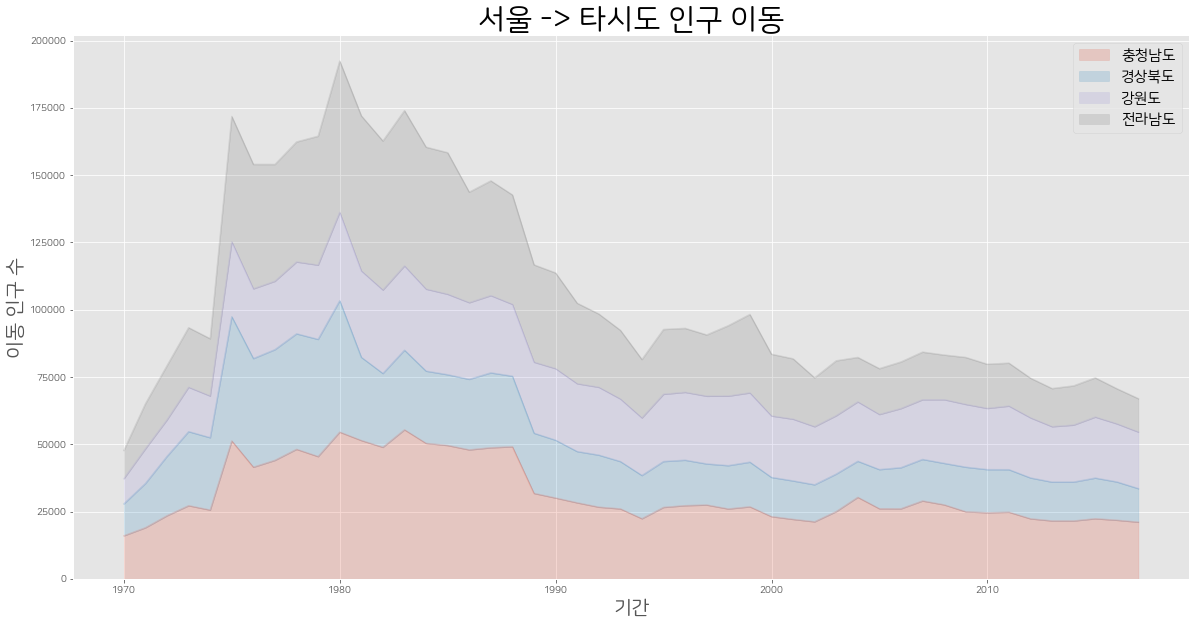

In [4]:
# 면적 그래프 그리기
df_4.plot(kind='area', stacked=True, alpha=0.2, figsize=(20, 10))
plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)
plt.show()

##### <예제 4-14> 면적 그래프(stacked=True) 그리기

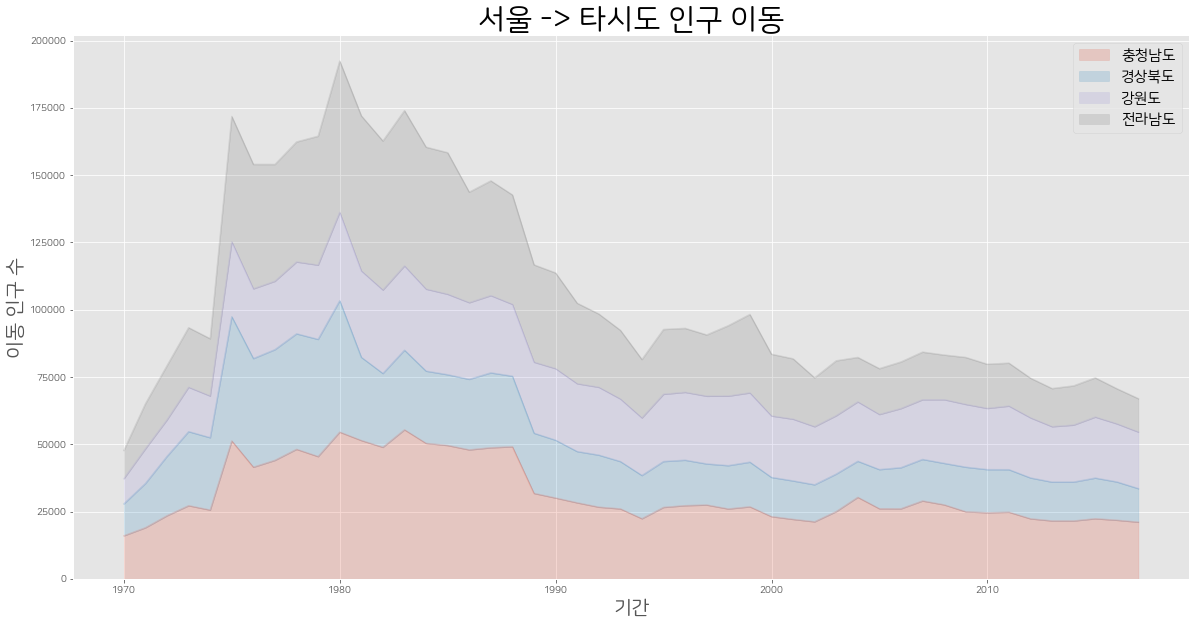

In [5]:
# 면적 그래프 그리기
df_4.plot(kind='area', stacked=True, alpha=0.2, figsize=(20, 10))
plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)
plt.show()

##### <예제 4-15> axes 객체 속성 변경하기

<class 'matplotlib.axes._subplots.AxesSubplot'>


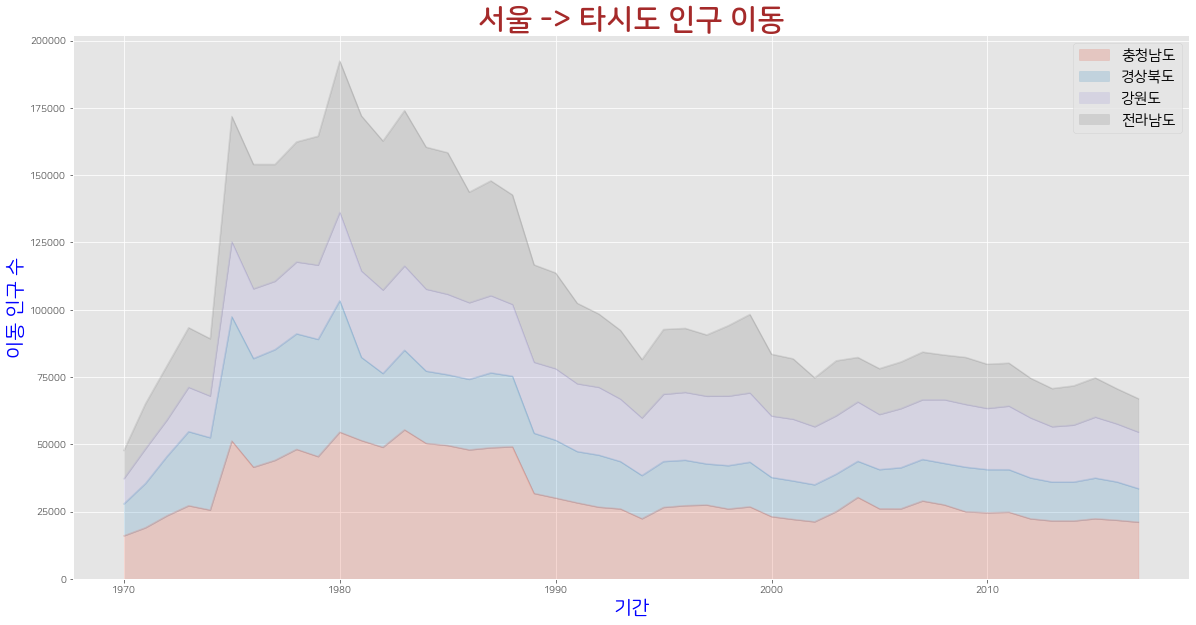

In [6]:
# 면적 그래프 ax 객체 생성
ax = df_4.plot(kind='area', stacked=True, alpha=0.2, figsize=(20, 10))
print(type(ax))

# axe 객체 설정 변경
ax.set_title('서울 -> 타시도 인구 이동', size=30, color='brown', weight='bold')
ax.set_ylabel('이동 인구 수', size=20, color='blue')
ax.set_xlabel('기간', size=20, color='blue')
ax.legend(loc='best', fontsize=15)
plt.show()

### 1-3. 막대 그래프

##### <예제 4-16> 세로형 막대 그래프

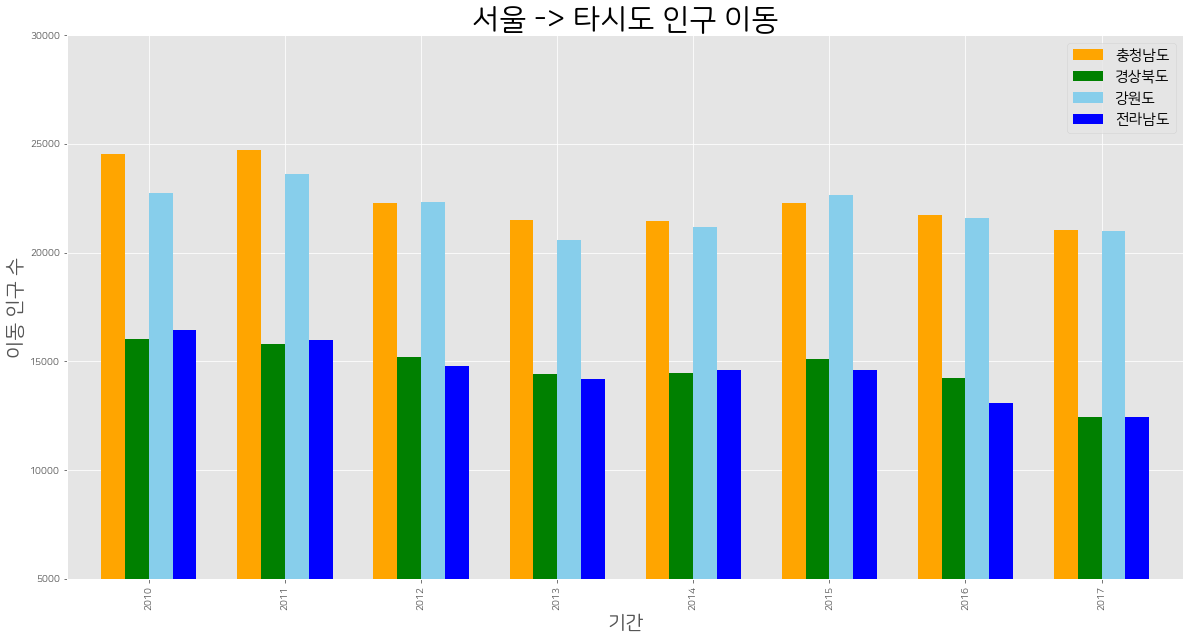

In [18]:
df_4 = df_4.loc[2010:2018. :]

df_4.plot(kind='bar', figsize=(20, 10), width=0.7,
          color=['orange', 'green', 'skyblue', 'blue'])
plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.ylim(5000, 30000)
plt.legend(loc='best', fontsize=15)
plt.show()

##### <예제 4-17> 가로형 막대 그래프

In [19]:
# 큰 값부터 정렬
# 2010-2017년 이동 인구 수를 합계하여 새로운 열로 추가
df_4 = df_4.transpose()
df_4['합계'] = df_4.sum(axis=1)

# 가장 큰 값부터 정렬
df_total = df_4[['합계']].sort_values('합계', ascending=True)
print(df_total)

            합계
전입지           
전라남도  116035.0
경상북도  117740.0
강원도   175731.0
충청남도  179533.0


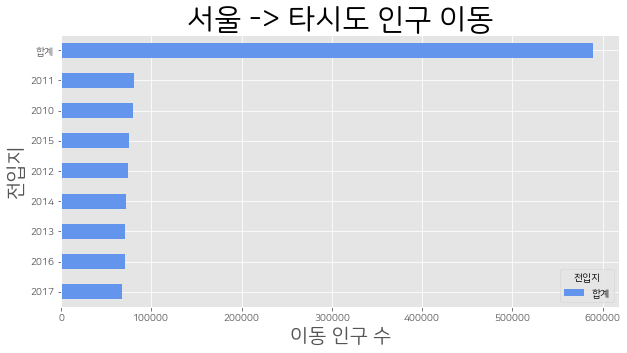

In [11]:
df_total.plot(kind='barh', figsize=(10, 5), width=0.5, color='cornflowerblue')
plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('전입지', size=20)
plt.xlabel('이동 인구 수', size=20)
plt.show()

##### <예제 4-18> 2축 그래프 그리기

In [20]:
# 마이너스 부호 출력 설정
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_excel('G:/강의자료/[책] 파이썬 머신러닝 판다스 데이터 분석/part4/남북한발전전력량.xlsx', convert_float=False)
df = df.loc[5:9]
df.drop('전력량 (억㎾h)', axis=1, inplace=True)
df.set_index('발전 전력별', inplace=True)
df = df.T

# 증감률(변동률) 계산
df.rename(columns={'합계':'총발전량'}, inplace=True)
df['총발전량 - 1년'] = df['총발전량'].shift(1)
df['증감률'] = ((df['총발전량']/df['총발전량 - 1년']) - 1) * 100
print(df)

발전 전력별 총발전량   수력   화력 원자력 총발전량 - 1년       증감률
1990    277  156  121   -       NaN       NaN
1991    263  150  113   -       277  -5.05415
1992    247  142  105   -       263  -6.08365
1993    221  133   88   -       247  -10.5263
1994    231  138   93   -       221   4.52489
1995    230  142   88   -       231   -0.4329
1996    213  125   88   -       230   -7.3913
1997    193  107   86   -       213  -9.38967
1998    170  102   68   -       193  -11.9171
1999    186  103   83   -       170   9.41176
2000    194  102   92   -       186   4.30108
2001    202  106   96   -       194   4.12371
2002    190  106   84   -       202  -5.94059
2003    196  117   79   -       190   3.15789
2004    206  125   81   -       196   5.10204
2005    215  131   84   -       206   4.36893
2006    225  126   99   -       215   4.65116
2007    236  133  103   -       225   4.88889
2008    255  141  114   -       236   8.05085
2009    235  125  110   -       255  -7.84314
2010    237  134  103   -       23

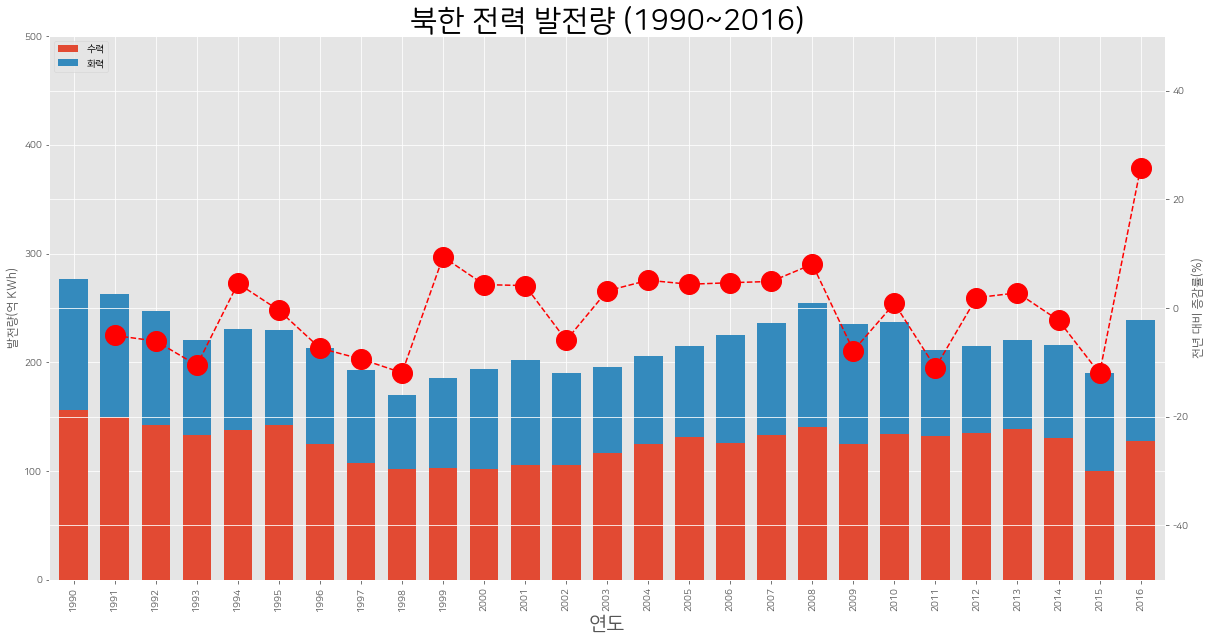

In [21]:
# 2축 그래프 그리기
ax1 = df[['수력', '화력']].plot(kind='bar', figsize=(20, 10), width=0.7, stacked=True)
ax2 = ax1.twinx()
ax2.plot(df.index, df.증감률, ls='--', marker='o', markersize=20,
         color='red', label='전년대비 증감률(%)')

ax1.set_ylim(0, 500)
ax2.set_ylim(-50, 50)
ax1.set_xlabel('연도', size=20)
ax1.set_ylabel('발전량(억 KWh)')
ax2.set_ylabel('전년 대비 증감률(%)')
plt.title('북한 전력 발전량 (1990~2016)', size=30)
ax1.legend(loc='upper left')
plt.show()


### 1-4. 히스토그램

##### <예제 4-19> 히스토그램

In [26]:
plt.style.use('classic')

df = pd.read_csv('G:\강의자료\[책] 파이썬 머신러닝 판다스 데이터 분석\part4/auto-mpg.csv', header=None)
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
              'acceleration', 'model year', 'origin', 'name']
print(df)

      mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0      130.0  3504.0          12.0   
1    15.0          8         350.0      165.0  3693.0          11.5   
2    18.0          8         318.0      150.0  3436.0          11.0   
3    16.0          8         304.0      150.0  3433.0          12.0   
4    17.0          8         302.0      140.0  3449.0          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0      86.00  2790.0          15.6   
394  44.0          4          97.0      52.00  2130.0          24.6   
395  32.0          4         135.0      84.00  2295.0          11.6   
396  28.0          4         120.0      79.00  2625.0          18.6   
397  31.0          4         119.0      82.00  2720.0          19.4   

     model year  origin                       name  
0            70       1  chevrolet chevelle malibu  
1            70       1          buick sk

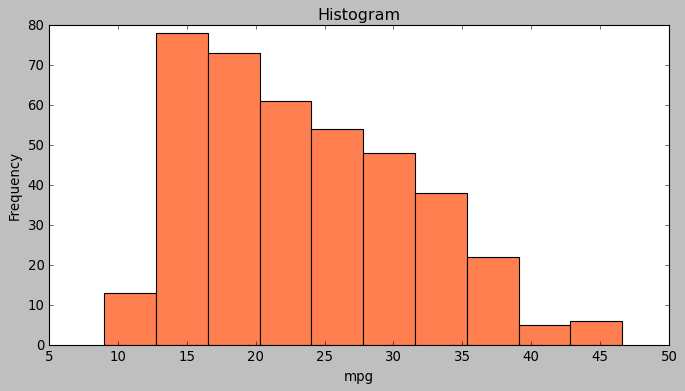

In [24]:
df['mpg'].plot(kind='hist', bins=10, color='coral', figsize=(10, 5))

plt.title('Histogram')
plt.xlabel('mpg')
plt.show()

### 1-5. 산점도

##### <예제 4-20> 산점도

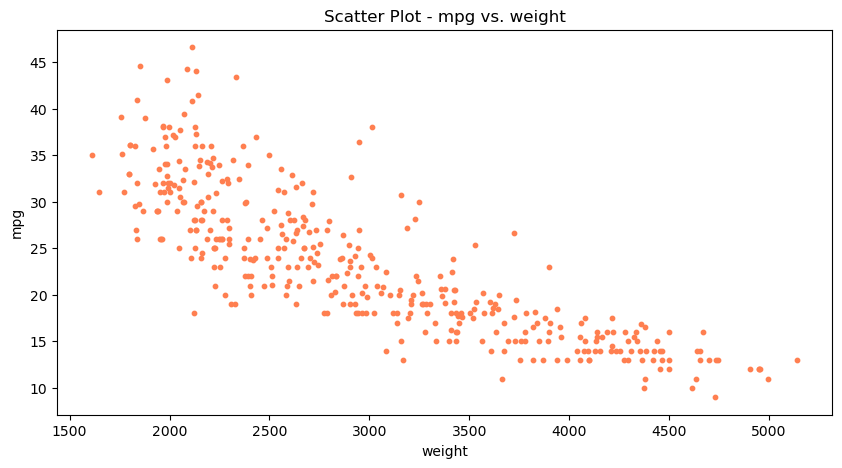

In [27]:
plt.style.use('default')

df.plot(kind='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10, 5))
plt.title('Scatter Plot - mpg vs. weight')
plt.show()

##### <예제 4-21> 버블 차트

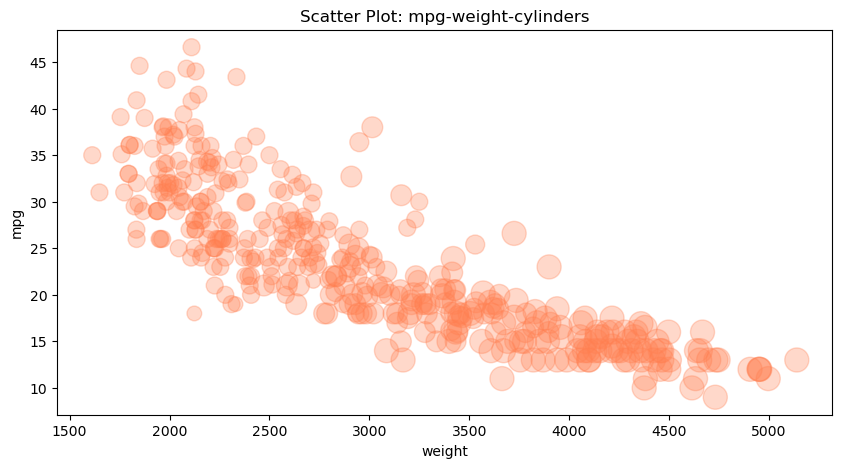

In [28]:
# cylinders 개수의 상대적 비율을 계산하여 시리즈 생성
cylinders_size = df.cylinders/df.cylinders.max() * 300

# 3개의 변수로 산점도 그리기
df.plot(kind='scatter', x='weight', y='mpg', c='coral', figsize=(10, 5),
        s=cylinders_size, alpha=0.3)
plt.title('Scatter Plot: mpg-weight-cylinders')
plt.show()

##### <예제 4-22> 그림 파일로 저장

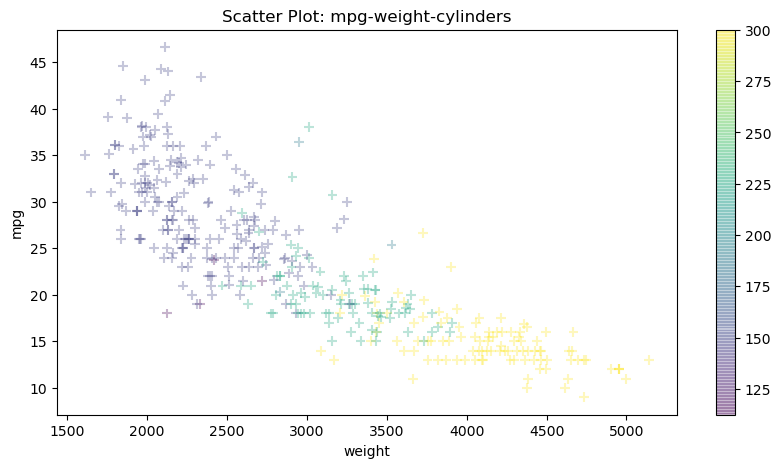

In [29]:
df.plot(kind='scatter', x='weight', y='mpg', marker='+', figsize=(10, 5),
       cmap='viridis', c=cylinders_size, s=50, alpha=0.3)
plt.title('Scatter Plot: mpg-weight-cylinders')
plt.savefig('./scatter.png')
plt.savefig('./scatter_transparent.png', transparent=True)
plt.show()

### 1-6. 파이 차트

##### <예제 4-23> 파이 차트

In [30]:
plt.style.use('default')
df['count'] = 1
df_origin = df.groupby('origin').sum()
df_origin.index = ['USA', 'EU', 'JPN']
print(df_origin.head())

        mpg  cylinders  displacement    weight  acceleration  model year  \
USA  5000.8       1556       61229.5  837121.0        3743.4       18827   
EU   1952.4        291        7640.0  169631.0        1175.1        5307   
JPN  2405.6        324        8114.0  175477.0        1277.6        6118   

     count  
USA    249  
EU      70  
JPN     79  


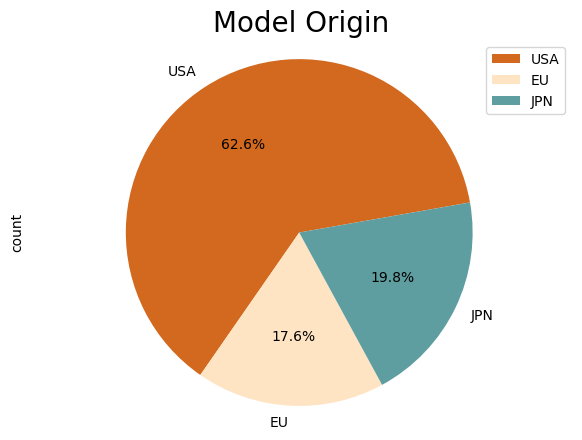

In [31]:
df_origin['count'].plot(kind='pie', figsize=(7, 5), autopct='%1.1f%%',
                        startangle=10, colors=['chocolate', 'bisque', 'cadetblue'])
plt.title('Model Origin', size=20)
plt.axis('equal')
plt.legend(labels=df_origin.index, loc='upper right')
plt.show()

### 1-7. 박스 플롯

##### <예제 4-24> 박스 플롯

In [32]:
from matplotlib import font_manager, rc
font_path = 'C:/Windows/Fonts/NanumSquareRoundR.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.style.use('seaborn-poster')
plt.rcParams['axes.unicode_minus'] = False

df.drop('count', axis=1, inplace=True)
print(df)

      mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0      130.0  3504.0          12.0   
1    15.0          8         350.0      165.0  3693.0          11.5   
2    18.0          8         318.0      150.0  3436.0          11.0   
3    16.0          8         304.0      150.0  3433.0          12.0   
4    17.0          8         302.0      140.0  3449.0          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0      86.00  2790.0          15.6   
394  44.0          4          97.0      52.00  2130.0          24.6   
395  32.0          4         135.0      84.00  2295.0          11.6   
396  28.0          4         120.0      79.00  2625.0          18.6   
397  31.0          4         119.0      82.00  2720.0          19.4   

     model year  origin                       name  
0            70       1  chevrolet chevelle malibu  
1            70       1          buick sk

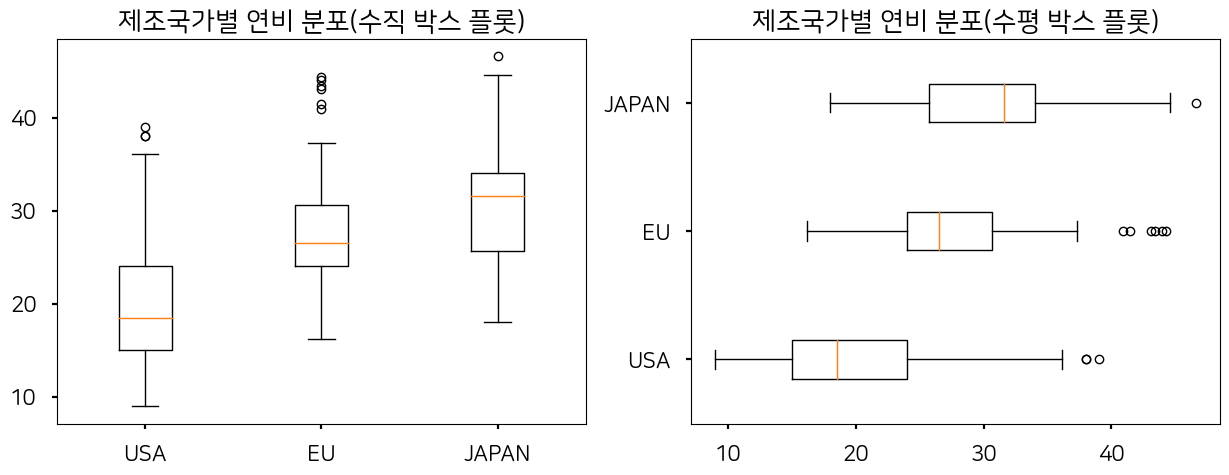

In [33]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.boxplot(x=[df[df['origin'] == 1]['mpg'],
               df[df['origin'] == 2]['mpg'],
               df[df['origin'] == 3]['mpg']],
            labels=['USA', 'EU', 'JAPAN'])
ax2.boxplot(x=[df[df['origin'] == 1]['mpg'],
               df[df['origin'] == 2]['mpg'],
               df[df['origin'] == 3]['mpg']],
            labels=['USA', 'EU', 'JAPAN'], vert=False)

ax1.set_title('제조국가별 연비 분포(수직 박스 플롯)')
ax2.set_title('제조국가별 연비 분포(수평 박스 플롯)')
plt.show()